In [1]:
import os

In [2]:
import fnmatch

def find_files(path, pattern):
    for root, dirs, files in os.walk(path):
        for file in fnmatch.filter(files, pattern):
            yield os.path.join(root, file)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def compute_class_distribution(list_tiff, plot=False):
    """
    Computes the class distribution of a NumPy array and optionally plots the results.
    
    Args:
        array (ndarray): The input NumPy array.
        plot (bool): Whether to plot the class distribution or not. Default is False.
        
    Returns:
        dict: A dictionary containing the class distribution, where the keys are the unique
              classes and the values are the corresponding counts.
    """
    
    final_array = np.empty(1)
    
    for tiff in list_tiff:
        # Open the TIFF image using PIL
        image = Image.open(tiff)

        # Convert the image to a NumPy array
        image_array = np.array(image)
    
        # Flatten the array to a 1D array
        flat_array = image_array.ravel()
    
        # Append the current array to final array
        final_array = np.append(final_array, flat_array.ravel())
        
    # Compute the unique classes and their counts
    classes, counts = np.unique(final_array, return_counts=True)

    # Create a dictionary to store the class distribution
    class_distribution = dict(zip(classes, counts))
    
    # Force the output to avoid "null" values in the dataset
    class_distribution = {key:value for (key,value) in class_distribution.items() if key in [1,2,3,4,5,6,7,8,9,10,11,12,13]}

    # Plot the class distribution if requested
    if plot:
        # Create the bar chart
        plt.bar(classes, counts)

        # Add labels and title
        plt.xlabel('Class')
        plt.ylabel('Count')
        plt.title('Class Distribution')
        x = [1,2,3,4,5,6,7,8,9,10,11,12,13]
        default_x_ticks = range(len(x))
        plt.xticks(default_x_ticks, x)
        plt.xlim(0.0, 13.0)

        # Show the plot
        plt.show()
    
    return class_distribution


# Class distribution

## Train distribution

In [4]:
# Get a list of path to train images
train_folder = '/home/tgrippa/project/weak_flair/subset_dataset/train'
train_tupple = [(os.path.split(x)[-1].split('.tif')[0],x) for x in find_files(train_folder, "MSK_*.tif")]
print(f'There are {len(train_tupple)} train images')

There are 0 train images


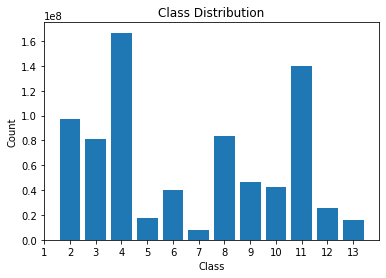

In [94]:
list_tiff = [x[1] for x in train_tupple[:]]
class_distribution = compute_class_distribution(list_tiff, plot=True)

## Test distribution

In [85]:
# Get a list of path to train images
train_folder = '/home/tgrippa/project/weak_flair/subset_dataset/test'
train_tupple = [(os.path.split(x)[-1].split('.tif')[0],x) for x in find_files(train_folder, "MSK_*.tif")]
print(f'There are {len(train_tupple)} test images')

There are 500 test images


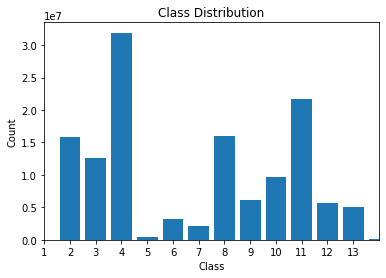

In [86]:
list_tiff = [x[1] for x in train_tupple[:]]
class_distribution = compute_class_distribution(list_tiff, plot=True)

# Class distribution on NDVI

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_density_curves_from_csv(csvfile_list, class_column, x_column):
    """
    Reads a list of CSV files containing statistics tables and plots different curves based on the different classes.
    
    Args:
        csvfile_list (list): List of file paths to CSV files.
        class_column (str): Column name containing the classes.
        x_column (str): Column name containing the x-values for the curves.
    """
    # Create an empty dictionary to store the data frames for each class
    class_data = {}
    
    # Iterate over the file list
    for file in csvfile_list:
        # Read the CSV file into a data frame
        df = pd.read_csv(file)
        
        # Get the unique classes in the class column
        classes = df[class_column].unique()
        
        # Iterate over the classes
        for class_name in classes:
            # Filter the data frame for the current class
            class_df = df[df[class_column] == class_name]
            
            # Retrieve the x values for the current class
            x_values = class_df[x_column]
                       
            # Store the data frame for the current class
            if class_name in class_data:
                class_data[class_name].append(class_df)
            else:
                class_data[class_name] = [class_df]

    # Draw the density plot
#    sns.distplot(subset['arr_delay'], hist = False, kde = True, kde_kws = {'linewidth': 3}, label = airline)
                 
#    # Set the plot title and labels
#    plt.title('Curves for Different Classes')
#    plt.xlabel(x_column)
#    plt.ylabel(y_column)
#    
#    # Display the legend
#    plt.legend()
#    
#    # Show the plot
#    plt.show()
    
    # Return the dictionary of data frames for each class
    return class_data

In [8]:
# Get a list of path to train images
train_folder = '/home/tais/result/stats'
#train_tupple = [(os.path.split(x)[-1].split('.tif')[0],x) for x in find_files(train_folder, "stats_IMG_*.csv")]
train_tupple = [x for x in find_files(train_folder, "stats_IMG_*.csv")]
print(f'There are {len(train_tupple)} csv')

There are 2950 csv


In [10]:
train_tupple[0]

'/home/tais/result/stats/stats_IMG_028689.csv'

In [ ]:
plot_density_curves_from_csv(train_tupple[:5], "gts_label", "ndvi_median")

In [36]:
csvfile_list = train_tupple[:10]
class_column = "gts_label"
x_column = "ndvi_median"

In [41]:
# Create an empty dictionary to store the data frames for each class
class_data = {}

# Iterate over the file list
for file in csvfile_list:
    # Read the CSV file into a data frame
    df = pd.read_csv(file)
    
    # Get the unique classes in the class column
    classes = df[class_column].unique()
    
    # Iterate over the classes
    for class_name in classes:
        # Filter the data frame for the current class
        class_df = df[df[class_column] == class_name]
        
        # Retrieve the x values for the current class
        x_values = class_df[x_column]
                   
        # Store the data frame for the current class
        if class_name not in class_data:
            class_data[class_name] = []        
        [class_data[class_name].append(x) for x in x_values]

# plot the density graph
sns.kdeplot(data, bw_adjust=.2, x="ndvi_median", hue="gts_label", palette="tab20")

In [42]:
df.head(5)

,cat,area,perimeter,compact_circle,compact_square,fd,red_stddev,red_coeff_var,red_sum,red_median,...,text_red_IDM_coeff_var,text_red_IDM_sum,text_red_IDM_median,text_red_IDM_perc_90,text_nir_DE_stddev,text_nir_DE_coeff_var,text_nir_DE_sum,text_nir_DE_median,text_nir_DE_perc_90,gts_label
0,-1052771071,108,70,1.900121,0.593846,1.814766,8.651117,7.022327,13305,124.0,...,26.452905,19.302865,0.197508,0.224976,0.252690,8.584114,317.918802,2.94966,3.31472,3
1,-1052771070,737,204,2.119783,0.532309,1.610920,4.454432,4.190333,78345,105.0,...,31.385248,303.452561,0.422335,0.569117,0.694981,37.389714,1369.897694,1.67645,2.91051,3
2,-1052771069,140,94,2.241088,0.503496,1.838777,10.507963,13.290405,11069,78.5,...,24.212776,23.984849,0.158677,0.229196,0.404575,14.431672,392.473819,2.75078,3.36152,3
3,-1052771068,132,66,1.620511,0.696311,1.716084,4.075976,7.789616,6907,52.0,...,24.426507,34.069302,0.256738,0.336748,0.437730,18.500272,312.321861,2.20766,3.08060,3
4,-1052771067,646,248,2.752520,0.409944,1.704095,2.177803,5.435042,25885,40.0,...,21.217105,350.127185,0.566513,0.649218,0.479729,46.199015,670.803828,0.94405,1.75766,3


In [43]:
class_data.keys()

dict_keys([3, 1, 10, 7, 8, 2, 6, 13, 5, 4, 11, 19])

<AxesSubplot:ylabel='Density'>

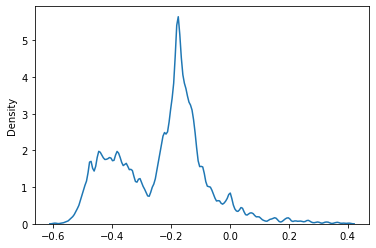

In [54]:
import seaborn as sns
sns.kdeplot(class_data[3], bw_adjust=.2, hue="time")

In [57]:
data = pd.read_csv(file)

<AxesSubplot:xlabel='ndvi_median', ylabel='Density'>

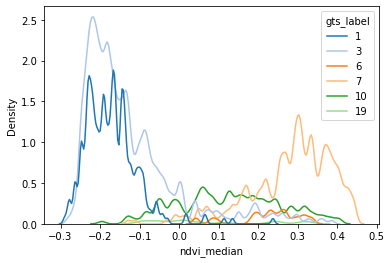

In [66]:
sns.kdeplot(data, bw_adjust=.2, x="ndvi_median", hue="gts_label", palette="tab20")